# Intelligent Android Defense Mechanism Leveraging Machine Learning to Combat Malware Threats

## Step1: Importing Packages and Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd     
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, pickle, joblib

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Step2: Importing Dataset

In [2]:
df = pd.read_csv('datasets/train_dataset.csv')

In [3]:
df.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [4]:
df.shape

(15036, 216)

In [5]:
df.columns

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


In [7]:
df.isnull().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

In [8]:
df.fillna(0, inplace = True)

In [9]:
df.columns

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)

In [10]:
df.replace('?', np.nan, inplace=True)  # Replace '?' with np.nan
df.dropna(inplace=True)

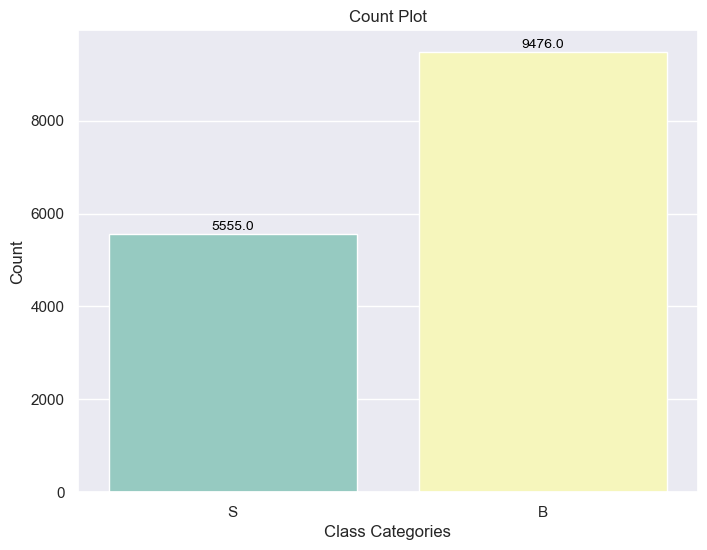

In [11]:
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x='class', data=df, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Class Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords='offset points')

plt.show()

In [12]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [13]:
X = df.drop(['class'], axis=1)
y = df['class']

In [14]:
X

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,0,1,0,0,1,1,1,0,0,0


In [15]:
y

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15031, dtype: int32

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [17]:
x_train.shape

(12024, 215)

In [18]:
x_test.shape

(3007, 215)

In [19]:
def rocGraph(testY, predict, algorithm):
    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict,pos_label=1)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    plt.title(algorithm+" ROC Graph")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.show()  

In [20]:
labels= ['Malware','Normal']

In [21]:
precision = []
recall = []
fscore = []
accuracy = []

In [22]:
#function to calculate various metrics such as accuracy, precision etc
def CalculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# DTC

In [23]:
def decisiontreeclassifier(): 
    
    dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=0)
    
    # Train the Decision Tree model
    dt_classifier.fit(x_train, y_train)
    
    # Make predictions on the test set
    predictions = dt_classifier.predict(x_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    

    rocGraph(y_test, predictions, "Decision Tree Classifier")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)
    # Compute classification report
    report = classification_report(y_test, predictions)
    CalculateMetrics('Decision Tree Classifier', y_test, predictions)

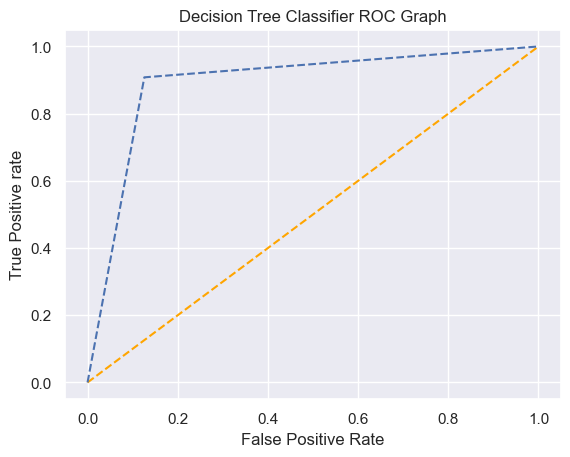

Decision Tree Classifier Accuracy    : 88.62653807781842
Decision Tree Classifier Precision   : 87.27758349818819
Decision Tree Classifier Recall      : 89.10856293388369
Decision Tree Classifier FSCORE      : 87.95702445426873

 Decision Tree Classifier classification report
               precision    recall  f1-score   support

     Malware       0.87      0.94      0.91      1786
      Normal       0.91      0.80      0.85      1221

    accuracy                           0.89      3007
   macro avg       0.89      0.87      0.88      3007
weighted avg       0.89      0.89      0.88      3007



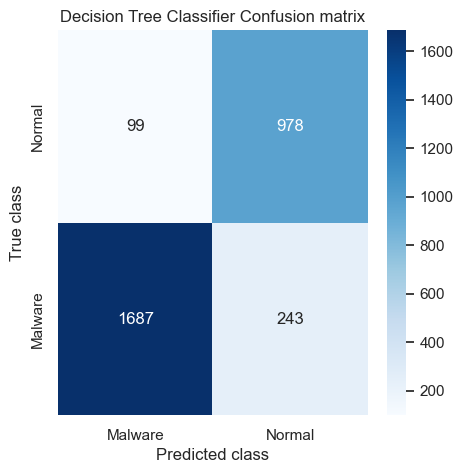

In [24]:
decisiontreeclassifier()

Model loaded successfully.
RandomForestClassifier Accuracy    : 99.16860658463585
RandomForestClassifier Precision   : 99.00351677322827
RandomForestClassifier Recall      : 99.18709787082804
RandomForestClassifier FSCORE      : 99.0941685177922

 RandomForestClassifier classification report
               precision    recall  f1-score   support

     Malware       0.99      1.00      0.99      1930
      Normal       0.99      0.98      0.99      1077

    accuracy                           0.99      3007
   macro avg       0.99      0.99      0.99      3007
weighted avg       0.99      0.99      0.99      3007



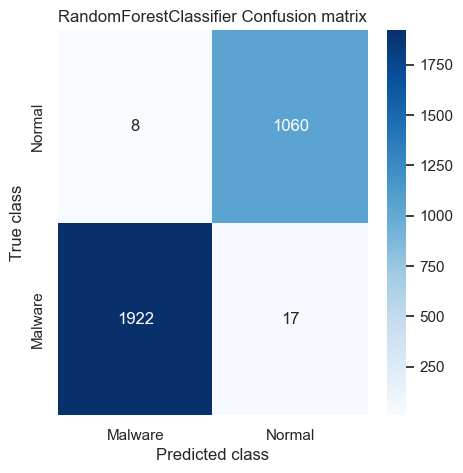

In [25]:
if os.path.exists('model/RandomForestClassifier.pkl'):
    # Load the trained model from the file
    rfc = joblib.load('model/RandomForestClassifier.pkl')
    print("Model loaded successfully.")
    predict = rfc.predict(x_test)
    CalculateMetrics("RandomForestClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    # Save the trained model to a file
    joblib.dump(rfc, 'model/RandomForestClassifier.pkl')
    print("Model saved successfully.") 
    predict = rfc.predict(x_test)
    CalculateMetrics("RandomForestClassifier", predict, y_test)

In [26]:
test = pd.read_csv('datasets/test.csv')

In [27]:
test.head()

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,READ_EXTERNAL_STORAGE,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0


In [28]:
test1 = test.values
prediction = rfc.predict(test1)

In [29]:
print(f'Predicted Outcomes for each row:\n')
for index, row in test.iterrows():
    # Get the prediction for the current row
    predicted_index = prediction[index]

    # Map predicted index to its corresponding label using unique_labels_list
    predicted_outcome = labels[predicted_index]

    # Print the current row of the dataset followed by its predicted outcome
    print(f'Row {index + 1}: {row.to_dict()} - Predicted Outcome: {predicted_outcome}\n\n\n\n\n')


Predicted Outcomes for each row:

Row 1: {'transact': 0, 'bindService': 0, 'onServiceConnected': 0, 'ServiceConnection': 0, 'android.os.Binder': 0, 'READ_SMS': 0, 'attachInterface': 0, 'WRITE_SMS': 0, 'TelephonyManager.getSubscriberId': 0, 'Ljava.lang.Class.getCanonicalName': 0, 'Ljava.lang.Class.getMethods': 0, 'android.intent.action.BOOT_COMPLETED': 1, 'Ljava.lang.Class.getField': 0, 'READ_PHONE_STATE': 1, 'Landroid.content.Context.unregisterReceiver': 0, 'GET_ACCOUNTS': 0, 'SEND_SMS': 0, 'Landroid.content.Context.registerReceiver': 0, 'getBinder': 0, 'Ljava.lang.Class.cast': 0, 'chmod': 1, 'createSubprocess': 0, 'Ljava.net.URLDecoder': 0, 'WRITE_APN_SETTINGS': 0, 'TelephonyManager.getDeviceId': 1, 'RECEIVE_SMS': 0, 'Ljava.lang.Class.getDeclaredField': 0, 'HttpGet.init': 0, 'Ljava.lang.Class.getPackage': 0, 'abortBroadcast': 0, 'ClassLoader': 0, 'TelephonyManager.getLine1Number': 1, 'getCallingUid': 0, 'USE_CREDENTIALS': 0, 'MANAGE_ACCOUNTS': 0, 'android.telephony.gsm.SmsManager': 0,

In [30]:
test['Pred'] = [labels[pred] for pred in prediction]
test

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED,Pred
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Normal
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,Malware
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malware
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,Malware
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,Malware
5,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,Malware
6,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,Malware
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Normal
8,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,Malware
9,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,Malware
